# Analysing Log data

In [1]:
import pandas as pd
import numpy as np
import urllib
from datetime import date
import urllib.parse
from datetime import datetime as dt
from datetime import timedelta
import datetime
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as ticker

In [2]:
# Get the collection name from the user
collection_input = input("Enter the collection name (leave blank for all):: ")
organisation_input = input("Enter the organisation (leave blank for all): ")
endpoint_input = input("Enter the endpoint (leave blank for all): ")

Enter the collection name (leave blank for all):: brownfield-land
Enter the organisation (leave blank for all): 
Enter the endpoint (leave blank for all): 


# Detailed List of endpoints processed since yesterday 

In [3]:
datasette_url = "https://datasette.planning.data.gov.uk/"

# Get the current date
current_date = dt.now().date()
previous_date = current_date - datetime.timedelta(days=1)


# Build the query to filter records for today's date
date_query = f" where substr(l.entry_date, 1, 10) >= '{previous_date}'"

query = ""
if collection_input:
    query = f" and s.collection = '{collection_input}'"
    
if organisation_input:
    query = f" and s.organisation = '{organisation_input}'"
    
if endpoint_input:
    query = f" and l.endpoint = '{endpoint_input}'"

params = urllib.parse.urlencode({
    "sql": f"""
    select l.endpoint,l.resource,s.collection, s.organisation,
    l.entry_date, l.end_date,l.start_date,l.status, l.exception
    from log l
    inner join source s
    on l.endpoint = s.endpoint
    {date_query}
    {query}
    order by l.entry_date desc
    """,
    "_size": "max"
})



url = f"{datasette_url}digital-land.csv?{params}"
df = pd.read_csv(url)
print("\033[1m List of endpoints processed since yesterday")
df


 List of endpoints processed since yesterday


endpoint  \
0    e17137a06b3071845cd87dc093827b5212db1a0f782079...   
1    466796e9f6e18591dead03d9e7836e02d6494ec1a5ac9e...   
2    512cfbf557558203d0012e1d95388bb01d30edd9b61672...   
3    8192467350b3e9a7f223a6cea958ba0f7434231151d704...   
4    cf91b1e94fe298ecf6383060c79b3dd7d030cdfd00bda9...   
..                                                 ...   
995  a53cbda53334dee00c119a0b6d8bdbaa8626345120e269...   
996  d6a17c18bcdfaa3eeb3516d34f3cf7480d464404a4233a...   
997  aaba4475ea32d9cc09ffbd9731b3374a834007828b5787...   
998  1945e57b32134a160bfb4972bcd6f86935b4c6fc0bd000...   
999  82a47f27098751444f9d70887f82a65376c081de559389...   

                                              resource       collection  \
0    cb0af9b4b276cdc6c150ce187006009e235e057d83ad3f...  brownfield-land   
1                                                  NaN  brownfield-land   
2                                                  NaN  brownfield-land   
3                                                  NaN  brownfield-land   
4    49a918dc51d8d4063061e5b0d257943aa194370ae1f07a...  brownfield-land   
..                                                 ...              ...   
995                                                NaN  brownfield-land   
996  c9a55b734c7c65307e2341ff1bee5b70f7c16ccdf89a5c...  brownfield-land   
997  a3efc12b4374fc4d186f7998987cd390c269ce1c99ff3e...  brownfield-land   
998  ad2030e211cbb0f3b7b72d1739b25798620f8913d56158...  brownfield-land   
999                                                NaN  brownfield-land   

                organisation            entry_date  end_date  start_date  \
0    local-authority-eng:HAL  2023-07-12T00:24:33Z       NaN         NaN   
1    local-authority-eng:WYO  2023-07-12T00:24:33Z       NaN         NaN   
2    local-authority-eng:BPL  2023-07-12T00:24:33Z       NaN         NaN   
3    local-authority-eng:RED  2023-07-12T00:24:33Z       NaN         NaN   
4    local-authority-eng:BAB  2023-07-12T00:24:33Z       NaN         NaN   
..                       ...                   ...       ...         ...   
995  local-authority-eng:BRD  2023-07-11T00:20:33Z       NaN         NaN   
996  local-authority-eng:CLD  2023-07-11T00:20:33Z       NaN         NaN   
997  local-authority-eng:LDS  2023-07-11T00:20:33Z       NaN         NaN   
998  local-authority-eng:AMB  2023-07-11T00:20:33Z       NaN         NaN   
999  local-authority-eng:SUF  2023-07-11T00:20:33Z       NaN         NaN   

     status exception  
0     200.0       NaN  
1       NaN  SSLError  
2     404.0       NaN  
3     404.0       NaN  
4     200.0       NaN  
..      ...       ...  
995     NaN  SSLError  
996   200.0       NaN  
997   200.0       NaN  
998   200.0       NaN  
999   404.0       NaN  

[1000 rows x 9 columns]

In [4]:
download = input("Do you want to download the result? (yes/no): ")

if download.lower() == "yes":
    # Save the DataFrame as a CSV file
    df.to_csv("query_result.csv", index=False)
    print("Query result downloaded as 'query_result.csv'")

Do you want to download the result? (yes/no): no


# Count of endpoints erroring/succesful

In [5]:
# Construct the params for the Datasette API request
params = urllib.parse.urlencode({
    "sql": f"""
    select substr(l.entry_date, 1, 10) as date, l.status, count(*) as 'count(endpoint)' from log l
    inner join source s
    on l.endpoint = s.endpoint
    where s.collection = '{collection_input}'
    group by l.entry_date, l.status
    order by l.entry_date desc
    """,
    "_size": "max"
})

# Construct the URL for the Datasette API request
url = f"{datasette_url}digital-land.csv?{params}"

# Read the CSV data from the URL into a DataFrame
df = pd.read_csv(url,dtype={'status': str})

print("\033[1m Count of endpoints erroring/successful for Collection: ",collection_input)
df


 Count of endpoints erroring/successful for Collection:  brownfield-land


date status  count(endpoint)
0    2023-07-12    NaN               62
1    2023-07-12    200              490
2    2023-07-12    403               11
3    2023-07-12    404              255
4    2023-07-12    410                2
..          ...    ...              ...
995  2023-02-27    502                2
996  2023-02-27    503                2
997  2023-02-26    NaN               50
998  2023-02-26    200              478
999  2023-02-26    403                1

[1000 rows x 3 columns]

In [6]:
download = input("Do you want to download the result? (yes/no): ")

if download.lower() == "yes":
    # Save the DataFrame as a CSV file
    df.to_csv("count_result.csv", index=False)
    print("Query result downloaded as 'count_result.csv'")

Do you want to download the result? (yes/no): no


# Number of endpoints added per year

Year  endpoints_added
0  2017                1
1  2018              331
2  2019              387
3  2020              321
4  2021              422
5  2022              137
6  2023               84

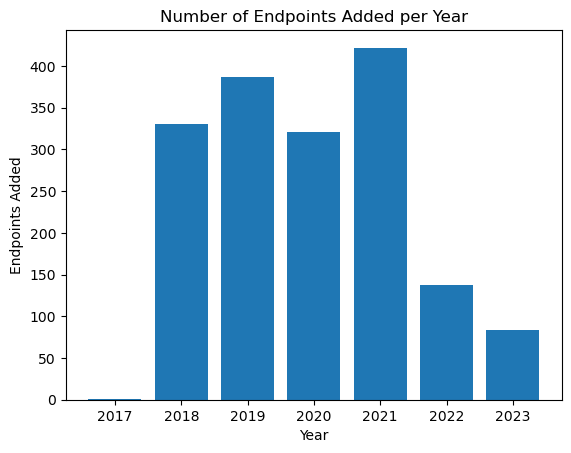

In [7]:
#endpoints added in each year 
params = urllib.parse.urlencode({
"sql": """
select substr(e.entry_date, 1, 4) as Year, count(e.endpoint) endpoints_added from endpoint e inner join source s on e.endpoint = s.endpoint group by Year order by Year
""",
"_size": "max"
})

url = f"{datasette_url}digital-land.csv?{params}"
df = pd.read_csv(url)
years = df['Year']
endpoints = df['endpoints_added']

#graph
plt.bar(years, endpoints)

plt.xlabel('Year')
plt.ylabel('Endpoints Added')
plt.title('Number of Endpoints Added per Year')

# Display data
display(df)
plt.show()


# Number of endpoints added per year per collection

In [8]:
#endpoints added in each year group by collection
params = urllib.parse.urlencode({
"sql": """
select substr(e.entry_date, 1, 4) as Year,s.collection, count(e.endpoint) endpoints_added from endpoint e inner join source s on e.endpoint = s.endpoint group by Year,s.collection Order by Year desc
""",
"_size": "max"
})

url = f"{datasette_url}digital-land.csv?{params}"
df = pd.read_csv(url)
df = df.pivot_table(index="collection", columns="Year", values="endpoints_added",  fill_value=0)
print("The values represents count of endpoints added for collection in that particular year")
df

The values represents count of endpoints added for collection in that particular year


Year                                 2017  2018  2019  2020  2021  2022  2023
collection                                                                   
ancient-woodland                        0     0     0     0     2     0     0
area-of-outstanding-natural-beauty      0     0     0     0     1     1     0
article-4-direction                     0     0     0     0     3    19     2
article-4-direction-area                0     0     0     0     0     5     0
brownfield-land                         1   331   387   182   144    21    82
brownfield-site                         0     0     0     3     0     0     0
central-activities-zone                 0     0     0     0     2     0     0
central-activity-zone                   0     0     0     0     1     0     0
conservation-area                       0     0     0    58     6     8     0
design-code                             0     0     0     0     0    18     0
developer-agreement-type                0     0     0     0     1     0     0
developer-contributions                 0     0     0    76   207    18     0
document                                0     0     0     0     2     0     0
green-belt                              0     0     0     0     7     1     0
green-belt-core                         0     0     0     0     1     0     0
heritage-coast                          0     0     0     0     1     0     0
historic-england                        0     0     0     0    12     2     0
infrastructure-funding-statement        0     0     0     0     0     1     0
legislation                             0     0     0     0     2     0     0
listed-building                         0     0     0     0     4     7     0
listed-building-outline                 0     0     0     0     0     1     0
local-authority-district                0     0     0     0     9     0     0
local-planning-authority                0     0     0     0     0     3     0
national-park                           0     0     0     2     0     0     0
organisation                            0     0     0     0     0    22     0
ownership-status                        0     0     0     0     1     0     0
parish                                  0     0     0     0     1     0     0
planning-permission-status              0     0     0     0     1     0     0
planning-permission-type                0     0     0     0     1     0     0
ramsar                                  0     0     0     0     2     0     0
region                                  0     0     0     0     1     0     0
site-category                           0     0     0     0     1     0     0
site-of-special-scientific-interest     0     0     0     0     1     0     0
special-area-of-conservation            0     0     0     0     1     0     0
special-protection-area                 0     0     0     0     0     1     0
tree-preservation-order                 0     0     0     0     7     5     0
tree-preservation-zone                  0     0     0     0     0     4     0

# List of Endpoints erroring, Grouped by Collection Name

In [9]:
#endpoint list with collection name which has an error status 

params = urllib.parse.urlencode({
"sql": f"""
select
  l.endpoint,
  l.status,
  s.collection,
  s.organisation,
  l.entry_date
from
  log l
  inner join source s on l.endpoint = s.endpoint 
 {date_query} and
  l.status != 200 
  and (
    l.end_date is null
    or l.end_date = ""
  ) 
 
group by
  l.endpoint,
  l.status
order by
  l.endpoint,s.collection,s.organisation, l.entry_date desc""",
"_size": "max"
})

url = f"{datasette_url}digital-land.csv?{params}"
df = pd.read_csv(url)
df

endpoint  status  \
0    02555422754afe68c07c2813ecc77960d7c31fabe28d9b...     NaN   
1    029cb9e14e0428ef9dc4a2d7afe8a8a904f19af1ad4cfc...   404.0   
2    035221aa7f7ff460fd08b3612e5c05b48d1fea1e2453d1...   404.0   
3    035538e79df78d7564f052a0aa3c3fe2d4b12044fc49f9...   404.0   
4    03671eb3a3bf3a6d932458c62133d702802720baf3f355...     NaN   
..                                                 ...     ...   
474  ff2702756c14c9f349738b11b77ab0633a765e85c7ea82...   404.0   
475  ff3a568c9cc2f76a4358e0a60a71a7c92c10f07df7e257...   404.0   
476  ff6b5edced535bb121b7c9264383fdb42f9d52c847b64e...   404.0   
477  ff932883d9f76806ea5f71cab465cce00119899aa3ec57...   404.0   
478  fff29e0c36acb91a51b968a7de6a8880bfeec9a202b1f7...   404.0   

                  collection                       organisation  \
0    developer-contributions            local-authority-eng:HYN   
1            brownfield-land            local-authority-eng:CHL   
2            brownfield-land  national-park-authority:Q27159704   
3            brownfield-land  national-park-authority:Q72617158   
4    developer-contributions            local-authority-eng:NTY   
..                       ...                                ...   
474          brownfield-land            local-authority-eng:DEB   
475        conservation-area            local-authority-eng:NET   
476          brownfield-land            local-authority-eng:NUN   
477          brownfield-land            local-authority-eng:DAR   
478          brownfield-land            local-authority-eng:TES   

               entry_date  
0    2023-07-11T00:24:31Z  
1    2023-07-11T00:20:33Z  
2    2023-07-11T00:20:33Z  
3    2023-07-11T00:20:33Z  
4    2023-07-11T00:24:31Z  
..                    ...  
474  2023-07-11T00:20:33Z  
475  2023-07-11T00:05:56Z  
476  2023-07-11T00:20:33Z  
477  2023-07-11T00:20:33Z  
478  2023-07-11T00:20:33Z  

[479 rows x 5 columns]

In [10]:
download = input("Do you want to download the result? (yes/no): ")

if download.lower() == "yes":
    # Save the DataFrame as a CSV file
    df.to_csv("error_result.csv", index=False)
    print("Query result downloaded as 'error_result.csv'")

Do you want to download the result? (yes/no): no


# Weekly Error Rate Percentage Graph

In [11]:

start_date = "2023-01-01"
sql = F"""
select
  strftime('%Y',entry_date) as year,
  strftime('%W',entry_date)+1 as week,
  status,
  count(*) as count
from log
where entry_date >= '{start_date}'
 group by year, week, status
"""

params = urllib.parse.urlencode({
"sql": sql,
"_size": "max"
})

url = f"{datasette_url}digital-land.csv?{params}"
df = pd.read_csv(url, dtype={'status': str})

In [12]:
df["result"] = df["status"].apply(lambda status: "OK" if status == "200" else "Error")

In [13]:
df = df.pivot_table(index=["year", "week"], columns="result", values="count", aggfunc=np.sum, fill_value=0)

In [14]:
df["total"] = df["Error"] + df["OK"]
df["ratio"] = 100 * df["Error"] / df["total"]

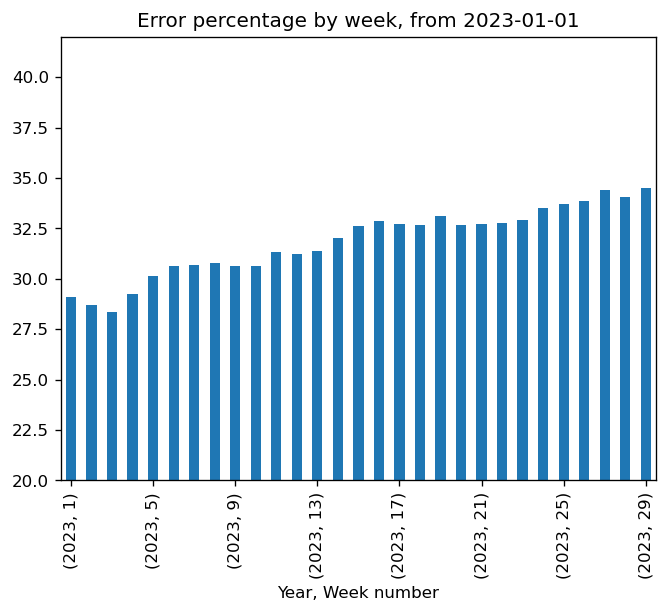

In [16]:
ymin = 4 * int((min(df["ratio"])) / 5) 
ymax = 6 * (math.ceil(max(df["ratio"])) / 5) 

plt.rcParams['figure.dpi'] = 120

ax = df.plot.bar(y="ratio" )

ax.set_title(F"Error percentage by week, from {start_date}")


ax.get_legend().remove()
ax.set_ylabel(None)
ax.set_ylim(ymin, ymax)

ax.set_xlabel("Year, Week number")
xlocator = ticker.MaxNLocator (9) #(min(6,int(df.shape[0]/8)))
ax.xaxis.set_major_locator(xlocator)